In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tqdm import tqdm
import os
import zipfile
from zipfile import ZipFile
import shutil
import pickle
import nltk
from nltk.tokenize import sent_tokenize

In [2]:
import sys
sys.path.append('/kaggle/input/sentence-transformers-222/sentence-transformers')
from sentence_transformers import SentenceTransformer, models

In [3]:
st_model = SentenceTransformer('/kaggle/input/sentence-transformers-222/all-MiniLM-L6-v2')

In [4]:
!pip install "/kaggle/input/d/fatmaaidi/language-tool-python/language_tool_python-2.7.1-py3-none-any.whl"

Processing /kaggle/input/d/fatmaaidi/language-tool-python/language_tool_python-2.7.1-py3-none-any.whl


In [5]:
# create download path
def get_language_tool_cache_path():
    # Get download path from environment or use default.
    download_path = os.environ.get(
        'LTP_PATH',
        os.path.join(os.path.expanduser("~"), ".cache", "language_tool_python")
    )
    # Make download path, if it doesn't exist.
    os.makedirs(download_path, exist_ok=True)
    return download_path

lt_path = get_language_tool_cache_path()
lt_path

'/root/.cache/language_tool_python'

In [6]:
#cant move files directly from input to cache, so we zip it to output and unzip again


def get_all_file_paths(directory):
  
    # initializing empty file paths list
    file_paths = []
  
    # crawling through directory and subdirectories
    for root, directories, files in os.walk(directory):
        for filename in files:
            # join the two strings in order to form the full filepath.
            filepath = os.path.join(root, filename)
            file_paths.append(filepath)
  
    # returning all file paths
    return file_paths        
  
def main():
    # path to folder which needs to be zipped
    directory = '/kaggle/input/languagetool57imroze/LanguageTool-5.7'
  
    # calling function to get all file paths in the directory
    file_paths = get_all_file_paths(directory)

    # writing files to a zipfile
    with ZipFile('./lt.zip','w') as zip:
        # writing each file one by one
        for file in file_paths:
            zip.write(file)
  
    print('All files zipped successfully!')        
  
main()


 
zip_file = "./lt.zip"
 
try:
    with zipfile.ZipFile(zip_file) as z:
        z.extractall()
        print("Extracted all")
except:
    print("Invalid file")
    
#move to cache
!mv {'/kaggle/input/languagetool57imroze/LanguageTool-5.7'} {lt_path} 
os.listdir('/root/.cache/language_tool_python/')

#remove files from output

#shutil.rmtree('/kaggle/input/')
#os.remove("./lt.zip")

All files zipped successfully!
Extracted all
mv: cannot remove '/kaggle/input/languagetool57imroze/LanguageTool-5.7/testrules.sh': Read-only file system
mv: cannot remove '/kaggle/input/languagetool57imroze/LanguageTool-5.7/META-INF/maven/org.languagetool/language-de/pom.properties': Read-only file system
mv: cannot remove '/kaggle/input/languagetool57imroze/LanguageTool-5.7/META-INF/maven/org.languagetool/language-de/pom.xml': Read-only file system
mv: cannot remove '/kaggle/input/languagetool57imroze/LanguageTool-5.7/META-INF/maven/org.languagetool/language-zh/pom.properties': Read-only file system
mv: cannot remove '/kaggle/input/languagetool57imroze/LanguageTool-5.7/META-INF/maven/org.languagetool/language-zh/pom.xml': Read-only file system
mv: cannot remove '/kaggle/input/languagetool57imroze/LanguageTool-5.7/META-INF/maven/org.languagetool/language-ro/pom.properties': Read-only file system
mv: cannot remove '/kaggle/input/languagetool57imroze/LanguageTool-5.7/META-INF/maven/org.l

['LanguageTool-5.7']

In [7]:
#shutil.rmtree('/kaggle/input/languagetool57imroze')
os.remove('/kaggle/working/lt.zip')

In [8]:
import language_tool_python
tool = language_tool_python.LanguageTool('en-US')

In [9]:
print('loaded language tool')

loaded language tool


In [10]:
!pip install "/kaggle/input/autocorrect/autocorrect-2.6.1.tar"
!pip install "/kaggle/input/pyspellchecker/pyspellchecker-0.7.2-py3-none-any.whl"

Processing /kaggle/input/autocorrect/autocorrect-2.6.1.tar
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=fbd8bcf72445d384a39bd9879cf7a8ea676bbc5f09a218bc3aff1dc889e32f44
  Stored in directory: /root/.cache/pip/wheels/db/69/42/0fb0421d2fe70d195a04665edc760cfe5fd341d7bb8d8e0aaa
Successfully built autocorrect
Processing /kaggle/input/pyspellchecker/pyspellchecker-0.7.2-py3-none-any.whl


In [11]:
!pip install "/kaggle/input/textstat-pypi/Pyphen-0.9.3-py2.py3-none-any.whl"
!pip install "/kaggle/input/textstat-pypi/textstat-0.7.0-py3-none-any.whl"

Processing /kaggle/input/textstat-pypi/Pyphen-0.9.3-py2.py3-none-any.whl
Processing /kaggle/input/textstat-pypi/textstat-0.7.0-py3-none-any.whl


In [12]:
df_train_p=pd.read_csv("/kaggle/input/commonlit-evaluate-student-summaries/prompts_train.csv")

In [13]:
df_train_s=pd.read_csv("/kaggle/input/commonlit-evaluate-student-summaries/summaries_train.csv")

In [14]:
df_train_p

,prompt_id,prompt_question,prompt_title,prompt_text
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
1,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
2,814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an..."


In [15]:
df_train_s

,student_id,prompt_id,text,content,wording
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757
...,...,...,...,...,...
7160,ff7c7e70df07,ebad26,They used all sorts of chemical concoctions to...,0.205683,0.380538
7161,ffc34d056498,3b9047,The lowest classes are slaves and farmers slav...,-0.308448,0.048171
7162,ffd1576d2e1b,3b9047,they sorta made people start workin...,-1.408180,-0.493603
7163,ffe4a98093b2,39c16e,An ideal tragety has three elements that make ...,-0.393310,0.627128


In [16]:
df_train_s[['content','wording']].describe()

,content,wording
count,7165.000000,7165.000000
mean,-0.014853,-0.063072
std,1.043569,1.036048
min,-1.729859,-1.962614
25%,-0.799545,-0.872720
50%,-0.093814,-0.081769
75%,0.499660,0.503833
max,3.900326,4.310693


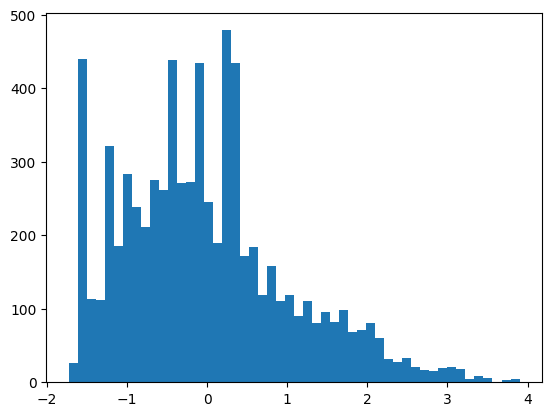

In [17]:
P=plt.hist(df_train_s['content'],bins=50)

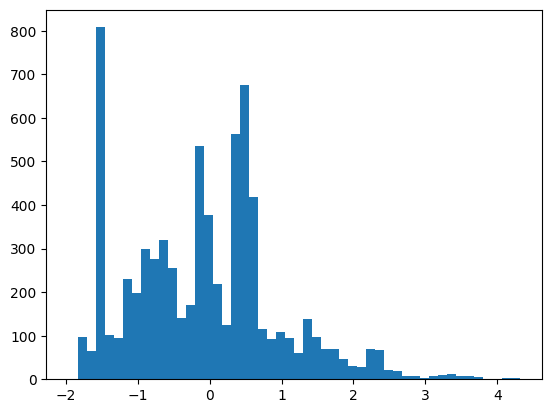

In [18]:
P=plt.hist(df_train_s['wording'],bins=50)

In [19]:
df_train_s['prompt_id'].value_counts()

prompt_id
39c16e    2057
3b9047    2009
ebad26    1996
814d6b    1103
Name: count, dtype: int64

In [20]:
lens = []
for i in range(len(df_train_p)):
    print('prompt_title',df_train_p['prompt_title'].iloc[i])
    print('prompt_question',df_train_p['prompt_question'].iloc[i])
    print('prompt_text',df_train_p['prompt_text'].iloc[i])
    print('______________________________')
    lens.append( len(df_train_p['prompt_text'].iloc[i]) )

prompt_title On Tragedy
prompt_question Summarize at least 3 elements of an ideal tragedy, as described by Aristotle.
prompt_text Chapter 13 
As the sequel to what has already been said, we must proceed to consider what the poet should aim at, and what he should avoid, in constructing his plots; and by what means the specific effect of Tragedy will be produced. 
A perfect tragedy should, as we have seen, be arranged not on the simple but on the complex plan. It should, moreover, imitate actions which excite pity and fear, this being the distinctive mark of tragic imitation. It follows plainly, in the first place, that the change of fortune presented must not be the spectacle of a virtuous man brought from prosperity to adversity: for this moves neither pity nor fear; it merely shocks us. Nor, again, that of a bad man passing from adversity to prosperity: for nothing can be more alien to the spirit of Tragedy; it possesses no single tragic quality; it neither satisfies the moral sense n

In [21]:
np.mean(lens),min(lens),max(lens)

(3852.75, 3345, 5136)

In [22]:
for i in range(20):
    txt = df_train_s['text'].iloc[i]
    print(txt,len(txt))
    print('___________')

The third wave was an experimentto see how people reacted to a new one leader government. It gained popularity as people wanted to try new things. The students follow anything that is said and start turning on eachother to gain higher power. They had to stop the experement as too many people got to radical with it blindly following there leader 346
___________
They would rub it up with soda to make the smell go away and it wouldnt be a bad smell. Some of the meat would be tossed on the floor where there was sawdust spit of the workers and they would make the meat all over again with the things in it. 244
___________
In Egypt, there were many occupations and social classes involved in day-to-day living. In many instances if you were at the bottom of the social ladder you could climb up, you didn't have to stay a peasant you could work to bring your status up. Everyone worshipped the gods Ra, Osiris, and Isis, but also they would worship their pharaohs like gods as well. Under the pharao

In [23]:
lens = []
sen_lens = []
for i in range(len(df_train_s)):
    txt = df_train_s['text'].iloc[i]
    lens.append(len(txt))
    tokenized_sentences = sent_tokenize(txt.replace(".",". "))
    #print(tokenized_sentences)
    num_sentences = len(tokenized_sentences)
    sen_lens.append(num_sentences)

In [24]:
np.mean(lens),max(lens),min(lens)

(418.776971388695, 3940, 114)

In [25]:
np.mean(sen_lens),max(sen_lens),min(sen_lens)

(4.1427773900907185, 98, 1)

In [26]:
s = "They would pickle it in an attempt to  keep it fresh. They would insert a hot iron that would burn off parts that had spoiled. They would make different products that hid the spoiled meat,and they would rub chemical ¨soda¨ on  the exterior of the meat to kill of mold and other things covering the spoiled meat.According to the text, ¨a man could fill a ham with pickle in a few seconds¨.This shows how they would pickle meat and it would still turn bad.The text also states that ¨ they would extract the bone, about which the bad part generally lay, and insert in the hole a white-hot iron.¨  This shows the process of them burning the spoil off. The passage also states that ¨ they would rub it up with soda to take away the smell, and sell it to be eaten on free-lunch counters¨. This qoute  shows how they would use ¨sodas¨to help meat appear freash"
s2 = s[:420]
print(len(s2))
tim = time.time()
emb = st_model.encode(s2,show_progress_bar=False)
print(emb.shape)
print( time.time() - tim )

s2 = "They would insert a hot iron that would burn off parts that had spoiled."
print(len(s2))
tim = time.time()
emb = st_model.encode(s2,show_progress_bar=False)
print(emb.shape)
print( time.time() - tim )

420
(384,)
0.15564727783203125
72
(384,)
0.018620967864990234


In [27]:
"""
The test set prompts. Contains the same fields as above. The prompts here are only an example. 
The full test set has a large number of prompts.
The train / public test / private test splits do not share any prompts.
"""

'\nThe test set prompts. Contains the same fields as above. The prompts here are only an example. \nThe full test set has a large number of prompts.\nThe train / public test / private test splits do not share any prompts.\n'

In [28]:
df_train_s

,student_id,prompt_id,text,content,wording
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757
...,...,...,...,...,...
7160,ff7c7e70df07,ebad26,They used all sorts of chemical concoctions to...,0.205683,0.380538
7161,ffc34d056498,3b9047,The lowest classes are slaves and farmers slav...,-0.308448,0.048171
7162,ffd1576d2e1b,3b9047,they sorta made people start workin...,-1.408180,-0.493603
7163,ffe4a98093b2,39c16e,An ideal tragety has three elements that make ...,-0.393310,0.627128


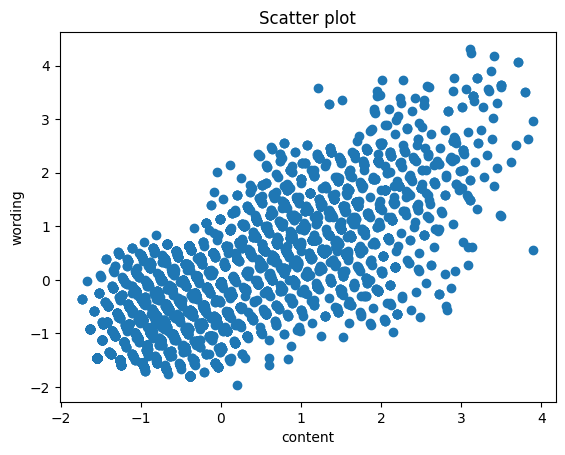

In [29]:
# Scatter plot
df = df_train_s
plt.scatter(df['content'], df['wording'])
plt.xlabel('content')
plt.ylabel('wording')
plt.title('Scatter plot')
plt.show()

In [30]:
df['content'].corr(df['wording'])

0.7513804859701966

In [31]:
df['wording'].corr(df['content'])

0.7513804859701966

In [32]:
len(df)

7165

In [33]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score

In [34]:
# Split the data into training and testing sets
X = df[['content']]
y = df['wording']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=100,max_depth=7)  # Using squared error as the objective
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.3f}")

Mean Squared Error: 0.137


In [35]:
# Split the data into training and testing sets
X = df[['wording']]
y = df['content']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=100,max_depth=7)  # Using squared error as the objective
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.04


In [36]:
X = df[['content']]
y = df['wording']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=100,max_depth=7)  # Using squared error as the objective

# K-Fold Cross Validation
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
results = cross_val_score(model, X, y, cv=kfold, scoring="neg_mean_squared_error")

# Output
print(results)
print(f"Mean MSE: {-np.mean(results):.2f}")
#print(f"Standard Deviation: {np.std(results):.2f}")

[-0.17086242 -0.17978075 -0.17043619]
Mean MSE: 0.17


In [37]:
X = df[['wording']]
y = df['content']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=100,max_depth=7)  # Using squared error as the objective

# K-Fold Cross Validation
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
results = cross_val_score(model, X, y, cv=kfold, scoring="neg_mean_squared_error")

# Output
print(results)
print(f"Mean MSE: {-np.mean(results):.2f}")
#print(f"Standard Deviation: {np.std(results):.2f}")

[-0.10658934 -0.13240575 -0.10511195]
Mean MSE: 0.11


In [38]:
from textblob import TextBlob

def spell_correction_tb(text):
    text = TextBlob(text)
    result = text.correct()
    return str(result)

In [39]:
from autocorrect import Speller
from spellchecker import SpellChecker
from typing import List

speller = Speller(lang='en')
spellchecker = SpellChecker()

In [40]:
def spelling(text):
    wordlist=text.split()
    amount_miss = len(list(spellchecker.unknown(wordlist)))
    return amount_miss

def add_spelling_dictionary(tokens: List[str]) -> List[str]:
    """dictionary update for pyspell checker and autocorrect"""
    spellchecker.word_frequency.load_words(tokens)
    speller.nlp_data.update({token:1000 for token in tokens})

In [41]:
s='He is goeng home'
print(spelling(s))
print(speller(s))

1
He is going home


In [42]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [43]:
def get_coherence_complexities(text):
    doc = nlp(text)
    # Calculate the average sentence length
    #num_sentences = len(list(doc.sents))
    num_sentences = len(sent_tokenize(text.replace(".",". ")))
    num_words = len(doc)
    avg_sentence_length = num_words / num_sentences
    # Calculate the coherence of discourse
    num_connectives = len([token for token in doc if token.dep_ == "mark"])
    try:
        #coherence = num_connectives / (num_sentences - 1)
        coherence = num_connectives / (num_sentences)
    except ZeroDivisionError:
        coherence = 0
    # Calculate the lexical and grammatical complexity
    num_named_entities = len(doc.ents)
    num_dependent_clauses = len([token for token in doc if token.dep_ == "mark" or token.dep_ == "advcl"])
    num_compound_nouns = len([token for token in doc if token.pos_ == "NOUN" and token.dep_ == "compound"])
    num_proper_nouns = len([token for token in doc if token.pos_ == "PROPN"])
    num_adjectives = len([token for token in doc if token.pos_ == "ADJ"])
    num_adverbs = len([token for token in doc if token.pos_ == "ADV"])
    num_prepositions = len([token for token in doc if token.pos_ == "ADP"])
    num_conjunctions = len([token for token in doc if token.pos_ == "CCONJ"])
    num_pronouns = len([token for token in doc if token.pos_ == "PRON"])
    lexical_complexity = (num_named_entities + num_dependent_clauses + num_compound_nouns + num_proper_nouns + num_adjectives + num_adverbs) / num_words
    grammatical_complexity = (num_prepositions + num_conjunctions + num_pronouns) / num_words
    
    return (coherence,lexical_complexity,grammatical_complexity)

In [44]:
get_coherence_complexities('He is going home')

(0.0, 0.0, 0.25)

In [45]:
import textstat

def text_complexity(text):
    score=textstat.flesch_reading_ease(text)
    if(score>=0 and score<=29):
        #print("Very Confusing")
        return ([score,"Very Confusing"])
    elif(score>=30 and score<=49):
        #print("Difficult")
        return ([score,"Difficult"])
    elif(score>=50 and score<=59):
        #print("Fairly Difficult")
        return ([score,"Fairly Difficult"])
    elif(score>=60 and score<=69):
        #print("Standard")
        return ([score,"Standard"])
    elif(score>=70 and score<=79):
        #print("Fairly Easy")
        return ([score,"Fairly Easy"])
    elif(score>=80 and score<=89):
        #print("Easy")
        return ([score,"Easy"])
    elif(score>=90 and score<=100):
        #print("Very Easy")
        return ([score,"Very Easy"])
    return ([0,'Very Confusing'])

In [46]:
text_complexity('He is going home')

[92.8, 'Very Easy']

In [47]:
def spelling_grammar_mistakes(text):
    spelling_counts=0
    grammar_counts=0
    matches = tool.check(str(text))
    
    for i in range(len(matches)):
        #print('matches',i,matches[i])
        if(matches[i].ruleId=='MORFOLOGIK_RULE_EN_US'):
            """
            cntxt = list(matches[i].context)
            cntxt[matches[i].offset]='>'
            s = ''
            for v in cntxt:
                s+=v
            print(s)
            """
            spelling_counts+=1
        else:
            grammar_counts+=1
            
    return {'spelling_errors':spelling_counts,'grammar_errors':grammar_counts}

In [48]:
spelling_grammar_mistakes('He is goeng home')

{'spelling_errors': 1, 'grammar_errors': 0}

In [49]:
spelling_grammar_mistakes('He is goeng home')

{'spelling_errors': 1, 'grammar_errors': 0}

In [50]:
def extract_answer_features(input_answer):
    input_answer = input_answer.lower()
    tokenized_sentences = sent_tokenize(input_answer.replace(".",". "))
    #print(tokenized_sentences)
    num_sentences = len(tokenized_sentences)
    senten_lens = [ len(cur_sent.split(' ')) for cur_sent in tokenized_sentences ]
    #print(senten_lens)
    res = spelling_grammar_mistakes(input_answer)
    spelling_errors = float(res['spelling_errors']) / float(num_sentences)
    grammar_errors = float(res['grammar_errors']) / float(num_sentences)
    #input_answer_FTBSL = spell_correction_tb(input_answer)
    input_answer_FTBSL = speller(input_answer)
    #print(input_answer_FTBSL)
    answer_ts_complexity = text_complexity(input_answer_FTBSL)
    answer_ts_difficwords = textstat.difficult_words(input_answer_FTBSL)
    coherence,lexical_complexity,grammatical_complexity = get_coherence_complexities(input_answer_FTBSL)
    answer_len = len(input_answer_FTBSL.split(' '))
    feat_dict = dict()
    feat_dict['coherence']=coherence
    feat_dict['syl_complexity']=answer_ts_complexity[0]
    feat_dict['lex_complexity']=lexical_complexity
    feat_dict['gramm_complexity']=grammatical_complexity
    feat_dict['diffic_words']=answer_ts_difficwords / float(num_sentences)
    feat_dict['spelling_errors']=spelling_errors / float(num_sentences)
    feat_dict['grammar_errors']=grammar_errors / float(num_sentences)
    feat_dict['num_sentences']=num_sentences
    feat_dict['answer_len']=answer_len
    feat_dict['senten_len_max']=max(senten_lens)
    feat_dict['senten_len_min']=min(senten_lens)
    feat_dict['senten_len_avg']=np.mean(senten_lens)
    
    return feat_dict

In [51]:
tim = time.time()
feat_dict = extract_answer_features('He is goeng home. He will riturn soon.')
print( time.time() - tim )

0.13287115097045898


In [52]:
"""
feat_dict_data = { k:[] for k in list(feat_dict.keys())  }
for i in tqdm(range( len(df_train_s) )) :
    text = df_train_s['text'].iloc[i]
    feat_dict = extract_answer_features(text)
    for k in list(feat_dict.keys()):
        feat_dict_data[k].append( feat_dict[k] )
        
for k in list(feat_dict_data.keys()):
    df_train_s[k] = feat_dict_data[k]
    
df_train_s.to_csv("summaries_nlp_feats.csv",index=False)
"""

'\nfeat_dict_data = { k:[] for k in list(feat_dict.keys())  }\nfor i in tqdm(range( len(df_train_s) )) :\n    text = df_train_s[\'text\'].iloc[i]\n    feat_dict = extract_answer_features(text)\n    for k in list(feat_dict.keys()):\n        feat_dict_data[k].append( feat_dict[k] )\n        \nfor k in list(feat_dict_data.keys()):\n    df_train_s[k] = feat_dict_data[k]\n    \ndf_train_s.to_csv("summaries_nlp_feats.csv",index=False)\n'

In [53]:
df_train_s = pd.read_csv('/kaggle/input/summaries-nlp-features/summaries_nlp_feats.csv')

In [54]:
df_train_s.head(5)

,student_id,prompt_id,text,content,wording,coherence,syl_complexity,lex_complexity,gramm_complexity,diffic_words,spelling_errors,grammar_errors,num_sentences,answer_len,senten_len_max,senten_len_min,senten_len_avg
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,0.500000,18.02,0.281250,0.156250,2.750000,0.187500,0.250000,4,61,19,10,15.250000
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755,0.000000,61.00,0.145455,0.290909,1.500000,0.000000,1.000000,2,52,32,20,26.000000
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226,0.166667,0.00,0.152727,0.210909,3.166667,0.034722,0.090278,12,235,37,8,19.583333
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415,0.000000,54.56,0.214286,0.035714,0.800000,0.040000,0.120000,5,25,9,1,5.600000
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,0.428571,0.00,0.237288,0.211864,2.428571,0.091837,0.076531,14,206,23,5,14.571429


In [55]:
df = df_train_s.drop(columns=['student_id','prompt_id','text'])

In [56]:
df

,content,wording,coherence,syl_complexity,lex_complexity,gramm_complexity,diffic_words,spelling_errors,grammar_errors,num_sentences,answer_len,senten_len_max,senten_len_min,senten_len_avg
0,0.205683,0.380538,0.500000,18.02,0.281250,0.156250,2.750000,0.187500,0.250000,4,61,19,10,15.250000
1,-0.548304,0.506755,0.000000,61.00,0.145455,0.290909,1.500000,0.000000,1.000000,2,52,32,20,26.000000
2,3.128928,4.231226,0.166667,0.00,0.152727,0.210909,3.166667,0.034722,0.090278,12,235,37,8,19.583333
3,-0.210614,-0.471415,0.000000,54.56,0.214286,0.035714,0.800000,0.040000,0.120000,5,25,9,1,5.600000
4,3.272894,3.219757,0.428571,0.00,0.237288,0.211864,2.428571,0.091837,0.076531,14,206,23,5,14.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,0.205683,0.380538,0.500000,0.00,0.116883,0.246753,4.000000,0.000000,0.500000,2,67,51,16,33.500000
7161,-0.308448,0.048171,0.000000,45.77,0.120000,0.120000,2.666667,0.111111,0.444444,3,44,19,11,14.333333
7162,-1.408180,-0.493603,0.333333,23.77,0.245283,0.169811,2.666667,0.666667,0.666667,3,59,24,14,20.000000
7163,-0.393310,0.627128,0.333333,45.43,0.253968,0.174603,1.000000,0.111111,0.333333,3,59,25,10,19.666667


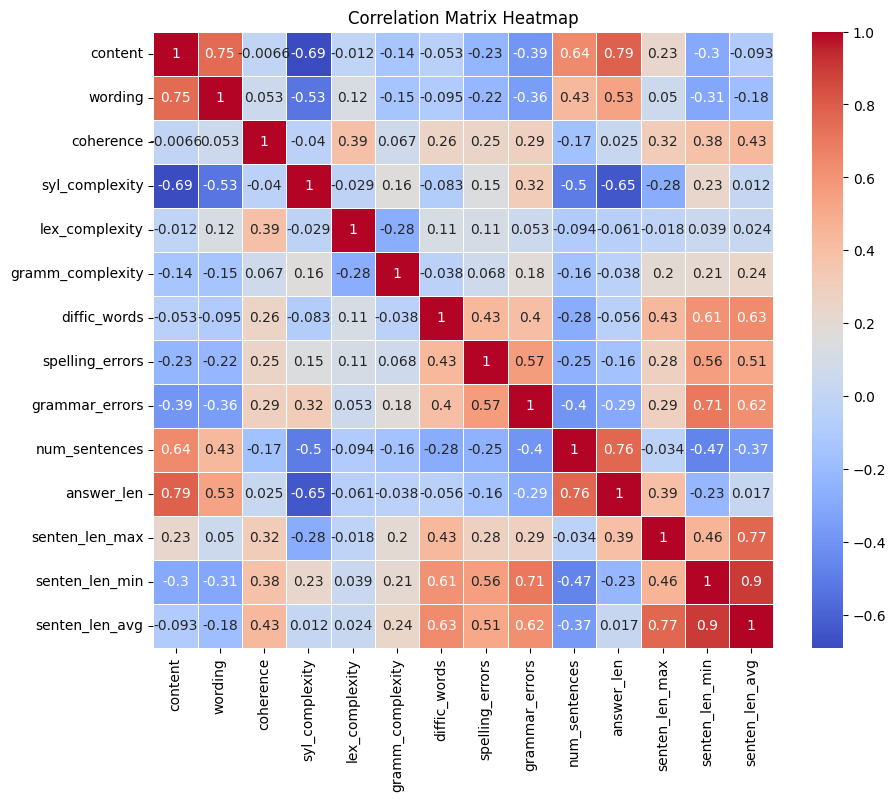

In [57]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [58]:
df_train_s.columns

Index(['student_id', 'prompt_id', 'text', 'content', 'wording', 'coherence',
       'syl_complexity', 'lex_complexity', 'gramm_complexity', 'diffic_words',
       'spelling_errors', 'grammar_errors', 'num_sentences', 'answer_len',
       'senten_len_max', 'senten_len_min', 'senten_len_avg'],
      dtype='object')

In [59]:
"""
# Split the data into training and testing sets
#for i in range(40,200):
df = df_train_s
X = df[['coherence','syl_complexity', 'lex_complexity', 'gramm_complexity', 'diffic_words',
        'spelling_errors', 'grammar_errors', 'num_sentences', 'answer_len',
        'senten_len_max', 'senten_len_min', 'senten_len_avg']]
y = df['wording']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=42,max_depth=4)  # Using squared error as the objective
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(i,f"Mean Squared Error: {mse:.3f}")
"""

'\n# Split the data into training and testing sets\n#for i in range(40,200):\ndf = df_train_s\nX = df[[\'coherence\',\'syl_complexity\', \'lex_complexity\', \'gramm_complexity\', \'diffic_words\',\n        \'spelling_errors\', \'grammar_errors\', \'num_sentences\', \'answer_len\',\n        \'senten_len_max\', \'senten_len_min\', \'senten_len_avg\']]\ny = df[\'wording\']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)\n\n# Initialize and train the XGBoost model\nmodel = xgb.XGBRegressor(objective =\'reg:squarederror\',n_estimators=42,max_depth=4)  # Using squared error as the objective\nmodel.fit(X_train, y_train)\n\n# Predictions\ny_pred = model.predict(X_test)\n\n# Evaluate the model\nmse = mean_squared_error(y_test, y_pred)\nprint(i,f"Mean Squared Error: {mse:.3f}")\n'

In [60]:
"""
df = df_train_s
X = df[['content','coherence','syl_complexity', 'lex_complexity', 'gramm_complexity', 'diffic_words',
        'spelling_errors', 'grammar_errors', 'num_sentences', 'answer_len',
        'senten_len_max', 'senten_len_min', 'senten_len_avg']]
y = df['wording']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=42,max_depth=8)  # Using squared error as the objective
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(i,f"Mean Squared Error: {mse:.3f}")
"""

'\ndf = df_train_s\nX = df[[\'content\',\'coherence\',\'syl_complexity\', \'lex_complexity\', \'gramm_complexity\', \'diffic_words\',\n        \'spelling_errors\', \'grammar_errors\', \'num_sentences\', \'answer_len\',\n        \'senten_len_max\', \'senten_len_min\', \'senten_len_avg\']]\ny = df[\'wording\']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)\n\n# Initialize and train the XGBoost model\nmodel = xgb.XGBRegressor(objective =\'reg:squarederror\',n_estimators=42,max_depth=8)  # Using squared error as the objective\nmodel.fit(X_train, y_train)\n\n# Predictions\ny_pred = model.predict(X_test)\n\n# Evaluate the model\nmse = mean_squared_error(y_test, y_pred)\nprint(i,f"Mean Squared Error: {mse:.3f}")\n'

In [61]:
"""
df = df_train_s
X = df[['content','coherence','syl_complexity', 'lex_complexity', 'gramm_complexity', 'diffic_words',
        'spelling_errors', 'grammar_errors', 'num_sentences', 'answer_len',
        'senten_len_max', 'senten_len_min', 'senten_len_avg']]
y = df['wording']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=84,max_depth=9)  # Using squared error as the objective
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(i,f"Mean Squared Error: {mse:.3f}")
"""

'\ndf = df_train_s\nX = df[[\'content\',\'coherence\',\'syl_complexity\', \'lex_complexity\', \'gramm_complexity\', \'diffic_words\',\n        \'spelling_errors\', \'grammar_errors\', \'num_sentences\', \'answer_len\',\n        \'senten_len_max\', \'senten_len_min\', \'senten_len_avg\']]\ny = df[\'wording\']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)\n\n# Initialize and train the XGBoost model\nmodel = xgb.XGBRegressor(objective =\'reg:squarederror\',n_estimators=84,max_depth=9)  # Using squared error as the objective\nmodel.fit(X_train, y_train)\n\n# Predictions\ny_pred = model.predict(X_test)\n\n# Evaluate the model\nmse = mean_squared_error(y_test, y_pred)\nprint(i,f"Mean Squared Error: {mse:.3f}")\n'

In [62]:
"""
df = df_train_s
X = df[['content','syl_complexity','grammar_errors',  'answer_len']]
y = df['wording']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=42,max_depth=8)  # Using squared error as the objective
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(i,f"Mean Squared Error: {mse:.3f}")
"""

'\ndf = df_train_s\nX = df[[\'content\',\'syl_complexity\',\'grammar_errors\',  \'answer_len\']]\ny = df[\'wording\']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)\n\n# Initialize and train the XGBoost model\nmodel = xgb.XGBRegressor(objective =\'reg:squarederror\',n_estimators=42,max_depth=8)  # Using squared error as the objective\nmodel.fit(X_train, y_train)\n\n# Predictions\ny_pred = model.predict(X_test)\n\n# Evaluate the model\nmse = mean_squared_error(y_test, y_pred)\nprint(i,f"Mean Squared Error: {mse:.3f}")\n'

In [63]:
"""
df = df_train_s
X = df[['content','syl_complexity']]
y = df['wording']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=84,max_depth=9)  # Using squared error as the objective
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(i,f"Mean Squared Error: {mse:.3f}")
"""

'\ndf = df_train_s\nX = df[[\'content\',\'syl_complexity\']]\ny = df[\'wording\']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)\n\n# Initialize and train the XGBoost model\nmodel = xgb.XGBRegressor(objective =\'reg:squarederror\',n_estimators=84,max_depth=9)  # Using squared error as the objective\nmodel.fit(X_train, y_train)\n\n# Predictions\ny_pred = model.predict(X_test)\n\n# Evaluate the model\nmse = mean_squared_error(y_test, y_pred)\nprint(i,f"Mean Squared Error: {mse:.3f}")\n'

In [64]:
"""
# Split the data into training and testing sets
#for i in range(40,200):
df = df_train_s
X = df[['coherence','syl_complexity', 'lex_complexity', 'gramm_complexity', 'diffic_words',
        'spelling_errors', 'grammar_errors', 'num_sentences', 'answer_len',
        'senten_len_max', 'senten_len_min', 'senten_len_avg']]
y = df['wording']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=42,max_depth=4)  # Using squared error as the objective
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(i,f"Mean Squared Error: {mse:.3f}")
"""

'\n# Split the data into training and testing sets\n#for i in range(40,200):\ndf = df_train_s\nX = df[[\'coherence\',\'syl_complexity\', \'lex_complexity\', \'gramm_complexity\', \'diffic_words\',\n        \'spelling_errors\', \'grammar_errors\', \'num_sentences\', \'answer_len\',\n        \'senten_len_max\', \'senten_len_min\', \'senten_len_avg\']]\ny = df[\'wording\']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)\n\n# Initialize and train the XGBoost model\nmodel = xgb.XGBRegressor(objective =\'reg:squarederror\',n_estimators=42,max_depth=4)  # Using squared error as the objective\nmodel.fit(X_train, y_train)\n\n# Predictions\ny_pred = model.predict(X_test)\n\n# Evaluate the model\nmse = mean_squared_error(y_test, y_pred)\nprint(i,f"Mean Squared Error: {mse:.3f}")\n'

In [65]:
"""
# Split the data into training and testing sets
#for i in range(40,200):
df = df_train_s
X = df[['content','coherence','syl_complexity', 'lex_complexity', 'gramm_complexity', 'diffic_words',
        'spelling_errors', 'grammar_errors', 'num_sentences', 'answer_len',
        'senten_len_max', 'senten_len_min', 'senten_len_avg']]
y = df['wording']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=42,max_depth=4)  # Using squared error as the objective
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(i,f"Mean Squared Error: {mse:.3f}")
"""

'\n# Split the data into training and testing sets\n#for i in range(40,200):\ndf = df_train_s\nX = df[[\'content\',\'coherence\',\'syl_complexity\', \'lex_complexity\', \'gramm_complexity\', \'diffic_words\',\n        \'spelling_errors\', \'grammar_errors\', \'num_sentences\', \'answer_len\',\n        \'senten_len_max\', \'senten_len_min\', \'senten_len_avg\']]\ny = df[\'wording\']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)\n\n# Initialize and train the XGBoost model\nmodel = xgb.XGBRegressor(objective =\'reg:squarederror\',n_estimators=42,max_depth=4)  # Using squared error as the objective\nmodel.fit(X_train, y_train)\n\n# Predictions\ny_pred = model.predict(X_test)\n\n# Evaluate the model\nmse = mean_squared_error(y_test, y_pred)\nprint(i,f"Mean Squared Error: {mse:.3f}")\n'

In [66]:
import shap

In [67]:
"""
# Create the SHAP explainer object
explainer = shap.Explainer(model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")
"""

'\n# Create the SHAP explainer object\nexplainer = shap.Explainer(model)\n\n# Calculate SHAP values for the test set\nshap_values = explainer.shap_values(X_test)\n\n# SHAP summary plot\nshap.summary_plot(shap_values, X_test, plot_type="bar")\n'

In [68]:
"""
# Create the SHAP explainer object
explainer = shap.Explainer(model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")
"""

'\n# Create the SHAP explainer object\nexplainer = shap.Explainer(model)\n\n# Calculate SHAP values for the test set\nshap_values = explainer.shap_values(X_test)\n\n# SHAP summary plot\nshap.summary_plot(shap_values, X_test, plot_type="bar")\n'

In [69]:
"""
# Split the data into training and testing sets
#for i in range(40,200):
df = df_train_s
X = df[['lex_complexity','num_sentences', 'answer_len','syl_complexity']]
y = df['wording']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=42,max_depth=4)  # Using squared error as the objective
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(i,f"Mean Squared Error: {mse:.3f}")
"""

'\n# Split the data into training and testing sets\n#for i in range(40,200):\ndf = df_train_s\nX = df[[\'lex_complexity\',\'num_sentences\', \'answer_len\',\'syl_complexity\']]\ny = df[\'wording\']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)\n\n# Initialize and train the XGBoost model\nmodel = xgb.XGBRegressor(objective =\'reg:squarederror\',n_estimators=42,max_depth=4)  # Using squared error as the objective\nmodel.fit(X_train, y_train)\n\n# Predictions\ny_pred = model.predict(X_test)\n\n# Evaluate the model\nmse = mean_squared_error(y_test, y_pred)\nprint(i,f"Mean Squared Error: {mse:.3f}")\n'

In [70]:
"""
# Split the data into training and testing sets
#for i in range(40,200):
df = df_train_s
X = df[['content','lex_complexity', 'senten_len_avg']]
y = df['wording']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=84,max_depth=9)  # Using squared error as the objective
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(i,f"Mean Squared Error: {mse:.3f}")
"""

'\n# Split the data into training and testing sets\n#for i in range(40,200):\ndf = df_train_s\nX = df[[\'content\',\'lex_complexity\', \'senten_len_avg\']]\ny = df[\'wording\']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)\n\n# Initialize and train the XGBoost model\nmodel = xgb.XGBRegressor(objective =\'reg:squarederror\',n_estimators=84,max_depth=9)  # Using squared error as the objective\nmodel.fit(X_train, y_train)\n\n# Predictions\ny_pred = model.predict(X_test)\n\n# Evaluate the model\nmse = mean_squared_error(y_test, y_pred)\nprint(i,f"Mean Squared Error: {mse:.3f}")\n'

In [71]:
"""
df = df_train_s
X = df[['coherence','syl_complexity', 'lex_complexity', 'gramm_complexity', 'diffic_words',
        'spelling_errors', 'grammar_errors', 'num_sentences', 'answer_len',
        'senten_len_max', 'senten_len_min', 'senten_len_avg']]
y = df['content']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=63,max_depth=3)  # Using squared error as the objective
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(i,f"Mean Squared Error: {mse:.3f}")
"""

'\ndf = df_train_s\nX = df[[\'coherence\',\'syl_complexity\', \'lex_complexity\', \'gramm_complexity\', \'diffic_words\',\n        \'spelling_errors\', \'grammar_errors\', \'num_sentences\', \'answer_len\',\n        \'senten_len_max\', \'senten_len_min\', \'senten_len_avg\']]\ny = df[\'content\']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)\n\n# Initialize and train the XGBoost model\nmodel = xgb.XGBRegressor(objective =\'reg:squarederror\',n_estimators=63,max_depth=3)  # Using squared error as the objective\nmodel.fit(X_train, y_train)\n\n# Predictions\ny_pred = model.predict(X_test)\n\n# Evaluate the model\nmse = mean_squared_error(y_test, y_pred)\nprint(i,f"Mean Squared Error: {mse:.3f}")\n'

In [72]:
"""
# Create the SHAP explainer object
explainer = shap.Explainer(model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")
"""

'\n# Create the SHAP explainer object\nexplainer = shap.Explainer(model)\n\n# Calculate SHAP values for the test set\nshap_values = explainer.shap_values(X_test)\n\n# SHAP summary plot\nshap.summary_plot(shap_values, X_test, plot_type="bar")\n'

In [73]:
"""
df = df_train_s
X = df[['coherence','syl_complexity', 'lex_complexity', 'gramm_complexity', 'diffic_words',
        'spelling_errors', 'grammar_errors', 'num_sentences', 'answer_len',
        'senten_len_max', 'senten_len_min', 'senten_len_avg']]
y = df['content']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=63,max_depth=3)  # Using squared error as the objective
model.fit(X_train, y_train)

# K-Fold Cross Validation
kfold = KFold(n_splits=4, shuffle=True, random_state=42)
results = cross_val_score(model, X, y, cv=kfold, scoring="neg_mean_squared_error")

# Output
print(results)
print(f"Mean MSE: {-np.mean(results):.3f}")
#print(f"Standard Deviation: {np.std(results):.2f}")
"""

'\ndf = df_train_s\nX = df[[\'coherence\',\'syl_complexity\', \'lex_complexity\', \'gramm_complexity\', \'diffic_words\',\n        \'spelling_errors\', \'grammar_errors\', \'num_sentences\', \'answer_len\',\n        \'senten_len_max\', \'senten_len_min\', \'senten_len_avg\']]\ny = df[\'content\']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)\n\n# Initialize and train the XGBoost model\nmodel = xgb.XGBRegressor(objective =\'reg:squarederror\',n_estimators=63,max_depth=3)  # Using squared error as the objective\nmodel.fit(X_train, y_train)\n\n# K-Fold Cross Validation\nkfold = KFold(n_splits=4, shuffle=True, random_state=42)\nresults = cross_val_score(model, X, y, cv=kfold, scoring="neg_mean_squared_error")\n\n# Output\nprint(results)\nprint(f"Mean MSE: {-np.mean(results):.3f}")\n#print(f"Standard Deviation: {np.std(results):.2f}")\n'

In [74]:
"""
df = df_train_s
X = df[['coherence','syl_complexity', 'lex_complexity', 'gramm_complexity', 'diffic_words',
        'spelling_errors', 'grammar_errors', 'num_sentences', 'answer_len',
        'senten_len_max', 'senten_len_min', 'senten_len_avg']]
y = df['wording']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=42,max_depth=4)  # Using squared error as the objective
model.fit(X_train, y_train)

# K-Fold Cross Validation
kfold = KFold(n_splits=4, shuffle=True, random_state=42)
results = cross_val_score(model, X, y, cv=kfold, scoring="neg_mean_squared_error")

# Output
print(results)
print(f"Mean MSE: {-np.mean(results):.3f}")
#print(f"Standard Deviation: {np.std(results):.2f}")
"""

'\ndf = df_train_s\nX = df[[\'coherence\',\'syl_complexity\', \'lex_complexity\', \'gramm_complexity\', \'diffic_words\',\n        \'spelling_errors\', \'grammar_errors\', \'num_sentences\', \'answer_len\',\n        \'senten_len_max\', \'senten_len_min\', \'senten_len_avg\']]\ny = df[\'wording\']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)\n\n# Initialize and train the XGBoost model\nmodel = xgb.XGBRegressor(objective =\'reg:squarederror\',n_estimators=42,max_depth=4)  # Using squared error as the objective\nmodel.fit(X_train, y_train)\n\n# K-Fold Cross Validation\nkfold = KFold(n_splits=4, shuffle=True, random_state=42)\nresults = cross_val_score(model, X, y, cv=kfold, scoring="neg_mean_squared_error")\n\n# Output\nprint(results)\nprint(f"Mean MSE: {-np.mean(results):.3f}")\n#print(f"Standard Deviation: {np.std(results):.2f}")\n'

In [75]:
# check len ratio too
# check content prediction to wording prediction

In [76]:
"""
from catboost import CatBoostRegressor

df = df_train_s
X = df[['coherence','syl_complexity', 'lex_complexity', 'gramm_complexity', 'diffic_words',
        'spelling_errors', 'grammar_errors', 'num_sentences', 'answer_len',
        'senten_len_max', 'senten_len_min', 'senten_len_avg']]
y = df['wording']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize and train the XGBoost model
model = CatBoostRegressor(depth=4, iterations=950, verbose=0)
model.fit(X_train, y_train)

# K-Fold Cross Validation
kfold = KFold(n_splits=4, shuffle=True, random_state=42)
results = cross_val_score(model, X, y, cv=kfold, scoring="neg_mean_squared_error")

# Output
print(results)
print(f"Mean MSE: {-np.mean(results):.3f}")
#print(f"Standard Deviation: {np.std(results):.2f}")
"""

'\nfrom catboost import CatBoostRegressor\n\ndf = df_train_s\nX = df[[\'coherence\',\'syl_complexity\', \'lex_complexity\', \'gramm_complexity\', \'diffic_words\',\n        \'spelling_errors\', \'grammar_errors\', \'num_sentences\', \'answer_len\',\n        \'senten_len_max\', \'senten_len_min\', \'senten_len_avg\']]\ny = df[\'wording\']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)\n\n# Initialize and train the XGBoost model\nmodel = CatBoostRegressor(depth=4, iterations=950, verbose=0)\nmodel.fit(X_train, y_train)\n\n# K-Fold Cross Validation\nkfold = KFold(n_splits=4, shuffle=True, random_state=42)\nresults = cross_val_score(model, X, y, cv=kfold, scoring="neg_mean_squared_error")\n\n# Output\nprint(results)\nprint(f"Mean MSE: {-np.mean(results):.3f}")\n#print(f"Standard Deviation: {np.std(results):.2f}")\n'

In [77]:
"""
from catboost import CatBoostRegressor

df = df_train_s
X = df[['coherence','syl_complexity', 'lex_complexity', 'gramm_complexity', 'diffic_words',
        'spelling_errors', 'grammar_errors', 'num_sentences', 'answer_len',
        'senten_len_max', 'senten_len_min', 'senten_len_avg']]
y = df['content']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize and train the XGBoost model
model = CatBoostRegressor(depth=6, iterations=500, verbose=0)
model.fit(X_train, y_train)

# K-Fold Cross Validation
kfold = KFold(n_splits=4, shuffle=True, random_state=42)
results = cross_val_score(model, X, y, cv=kfold, scoring="neg_mean_squared_error")

# Output
print(results)
print(f"Mean MSE: {-np.mean(results):.3f}")
#print(f"Standard Deviation: {np.std(results):.2f}")
"""

'\nfrom catboost import CatBoostRegressor\n\ndf = df_train_s\nX = df[[\'coherence\',\'syl_complexity\', \'lex_complexity\', \'gramm_complexity\', \'diffic_words\',\n        \'spelling_errors\', \'grammar_errors\', \'num_sentences\', \'answer_len\',\n        \'senten_len_max\', \'senten_len_min\', \'senten_len_avg\']]\ny = df[\'content\']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)\n\n# Initialize and train the XGBoost model\nmodel = CatBoostRegressor(depth=6, iterations=500, verbose=0)\nmodel.fit(X_train, y_train)\n\n# K-Fold Cross Validation\nkfold = KFold(n_splits=4, shuffle=True, random_state=42)\nresults = cross_val_score(model, X, y, cv=kfold, scoring="neg_mean_squared_error")\n\n# Output\nprint(results)\nprint(f"Mean MSE: {-np.mean(results):.3f}")\n#print(f"Standard Deviation: {np.std(results):.2f}")\n'

In [78]:
import lightgbm as lgb

"""

df = df_train_s
X = df[['coherence','syl_complexity', 'lex_complexity', 'gramm_complexity', 'diffic_words',
        'spelling_errors', 'grammar_errors', 'num_sentences', 'answer_len',
        'senten_len_max', 'senten_len_min', 'senten_len_avg']]
y = df['wording']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

dtrain = lgb.Dataset(X_train, label=y_train)
dval = lgb.Dataset(X_test, label=y_test)

params = {
    'boosting_type': 'gbdt',
    'random_state': 42,
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.048,
    'max_depth': 4,  #3
    'lambda_l1': 0.0,
    'lambda_l2': 0.011
}

evaluation_results = {}
model = lgb.train(params,
                  num_boost_round=10000,
                    #categorical_feature = categorical_features,
                  valid_names=['train', 'valid'],
                  train_set=dtrain,
                  valid_sets=dval,
                  callbacks=[
                      lgb.early_stopping(stopping_rounds=30, verbose=False),
                       lgb.log_evaluation(100),
                      lgb.callback.record_evaluation(evaluation_results)
                    ],
                  )

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(i,f"Mean Squared Error: {mse:.3f}")
"""

'\n\ndf = df_train_s\nX = df[[\'coherence\',\'syl_complexity\', \'lex_complexity\', \'gramm_complexity\', \'diffic_words\',\n        \'spelling_errors\', \'grammar_errors\', \'num_sentences\', \'answer_len\',\n        \'senten_len_max\', \'senten_len_min\', \'senten_len_avg\']]\ny = df[\'wording\']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)\n\ndtrain = lgb.Dataset(X_train, label=y_train)\ndval = lgb.Dataset(X_test, label=y_test)\n\nparams = {\n    \'boosting_type\': \'gbdt\',\n    \'random_state\': 42,\n    \'objective\': \'regression\',\n    \'metric\': \'rmse\',\n    \'learning_rate\': 0.048,\n    \'max_depth\': 4,  #3\n    \'lambda_l1\': 0.0,\n    \'lambda_l2\': 0.011\n}\n\nevaluation_results = {}\nmodel = lgb.train(params,\n                  num_boost_round=10000,\n                    #categorical_feature = categorical_features,\n                  valid_names=[\'train\', \'valid\'],\n                  train_set=dtrain,\n              

### Final Models

In [79]:
from sklearn.ensemble import RandomForestRegressor

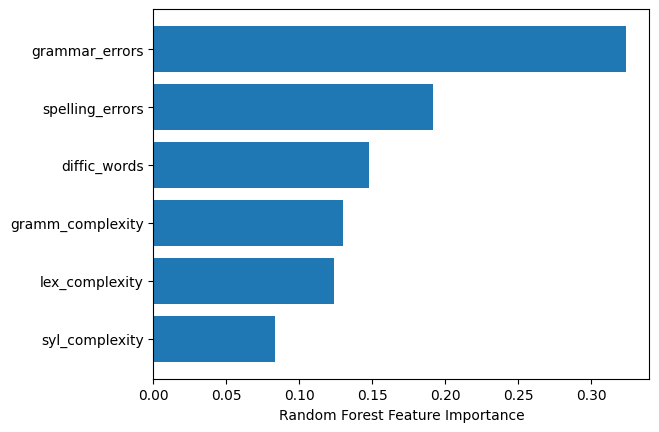

In [80]:
df = df_train_s
xcols = ['coherence','syl_complexity', 'lex_complexity', 'gramm_complexity', 'diffic_words',
        'spelling_errors', 'grammar_errors', 'num_sentences', 'answer_len',
        'senten_len_max', 'senten_len_min', 'senten_len_avg']

xcols = ['syl_complexity', 'lex_complexity', 'gramm_complexity', 'diffic_words',
        'spelling_errors', 'grammar_errors']

X = df[xcols]
y = df['wording']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

clf = RandomForestRegressor(n_estimators=50)
clf.fit(X_train, y_train)

# 4. Get feature importances
feature_importances = clf.feature_importances_

# 5. Plot feature importances
sorted_idx = feature_importances.argsort()
plt.barh(xcols, feature_importances[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

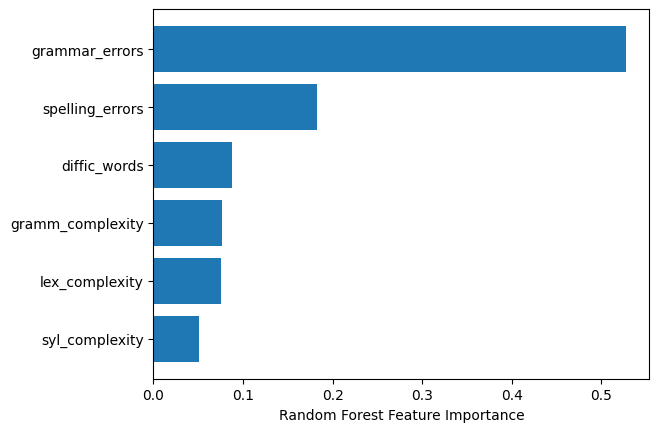

In [81]:
df = df_train_s
xcols = ['coherence','syl_complexity', 'lex_complexity', 'gramm_complexity', 'diffic_words',
        'spelling_errors', 'grammar_errors', 'num_sentences', 'answer_len',
        'senten_len_max', 'senten_len_min', 'senten_len_avg']

xcols = ['syl_complexity', 'lex_complexity', 'gramm_complexity', 'diffic_words',
        'spelling_errors', 'grammar_errors']

X = df[xcols]
y = df['content']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

clf = RandomForestRegressor(n_estimators=50)
clf.fit(X_train, y_train)

# 4. Get feature importances
feature_importances = clf.feature_importances_

# 5. Plot feature importances
sorted_idx = feature_importances.argsort()
plt.barh(xcols, feature_importances[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

In [82]:
import lightgbm as lgb

df = df_train_s

"""
X = df[['coherence','syl_complexity', 'lex_complexity', 'gramm_complexity', 'diffic_words',
        'spelling_errors', 'grammar_errors', 'num_sentences', 'answer_len',
        'senten_len_max', 'senten_len_min', 'senten_len_avg']]


X = df[['syl_complexity', 'lex_complexity', 'gramm_complexity','spelling_errors', 'grammar_errors']]
"""

#X = df[['syl_complexity', 'lex_complexity', 'gramm_complexity', 'grammar_errors', 'answer_len','senten_len_avg']]


X = df[['syl_complexity', 'lex_complexity', 'gramm_complexity', 'diffic_words',
        'spelling_errors', 'grammar_errors']]

y = df['wording']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

dtrain = lgb.Dataset(X_train, label=y_train)
dval = lgb.Dataset(X_test, label=y_test)

params = {
    'boosting_type': 'gbdt',
    'random_state': 42,
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.05, #0.06
    'max_depth': 5,  #5
    'lambda_l1': 0.0,
    'lambda_l2': 0.005 #0.006
}

evaluation_results = {}
model_wording = lgb.train(params,
                  num_boost_round=10000,
                    #categorical_feature = categorical_features,
                  valid_names=['train', 'valid'],
                  train_set=dtrain,
                  valid_sets=dval,
                  callbacks=[
                      lgb.early_stopping(stopping_rounds=50, verbose=False),
                       lgb.log_evaluation(100),
                      lgb.callback.record_evaluation(evaluation_results)
                    ],
                  )

# Predictions
y_pred = model_wording.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(i,f"Mean Squared Error: {mse:.3f}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1284
[LightGBM] [Info] Number of data points in the train set: 6806, number of used features: 6
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score -0.061884
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

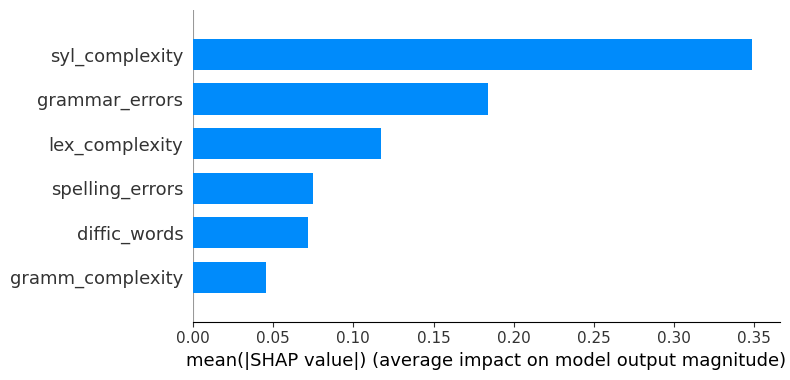

In [83]:
# Create the SHAP explainer object
explainer = shap.Explainer(model_wording)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [84]:
df = df_train_s
"""
X = df[['coherence','syl_complexity', 'lex_complexity', 'gramm_complexity', 'diffic_words',
        'spelling_errors', 'grammar_errors', 'num_sentences',
        'senten_len_max', 'senten_len_min', 'senten_len_avg']]
"""
X = df[['syl_complexity', 'lex_complexity', 'gramm_complexity', 'diffic_words',
        'spelling_errors', 'grammar_errors']]


y = df['content']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

dtrain = lgb.Dataset(X_train, label=y_train)
dval = lgb.Dataset(X_test, label=y_test)

params = {
    'boosting_type': 'gbdt',
    'random_state': 42,
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.05, #0.048 0.06
    'max_depth': 5,  #4
    'lambda_l1': 0.0,
    'lambda_l2': 0.01 #0.011
}

evaluation_results = {}
model_content = lgb.train(params,
                  num_boost_round=10000,
                    #categorical_feature = categorical_features,
                  valid_names=['train', 'valid'],
                  train_set=dtrain,
                  valid_sets=dval,
                  callbacks=[
                      lgb.early_stopping(stopping_rounds=50, verbose=False),
                       lgb.log_evaluation(100),
                      lgb.callback.record_evaluation(evaluation_results)
                    ],
                  )

# Predictions
y_pred = model_content.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(i,f"Mean Squared Error: {mse:.3f}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000577 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1284
[LightGBM] [Info] Number of data points in the train set: 6806, number of used features: 6
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score -0.011564
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

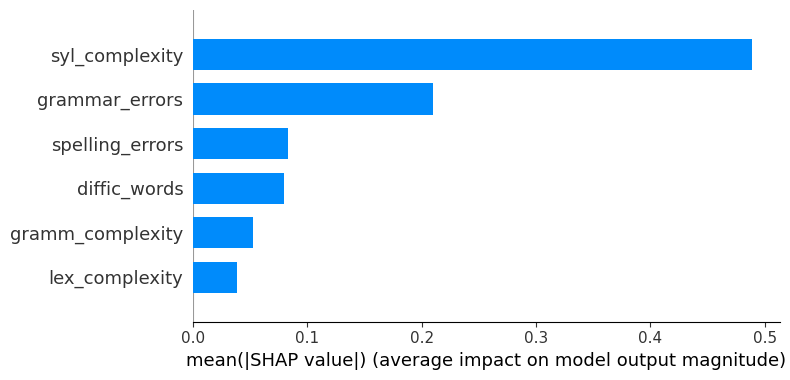

In [85]:
# Create the SHAP explainer object
explainer = shap.Explainer(model_content)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [86]:
content_preds = []
for i in tqdm(range(len(df_train_s))):
    feats = []
    for k in ['syl_complexity', 'lex_complexity', 'gramm_complexity', 'diffic_words',
        'spelling_errors', 'grammar_errors']:
        feats.append( float(df_train_s[k].iloc[i])  )
    pred = float(model_content.predict( np.array([feats]) )[0])
    content_preds.append(pred)

100%|██████████| 7165/7165 [00:01<00:00, 4640.39it/s]


In [87]:
wording_preds = []
for i in tqdm(range(len(df_train_s))):
    feats = []
    for k in ['syl_complexity', 'lex_complexity', 'gramm_complexity', 'diffic_words',
        'spelling_errors', 'grammar_errors']:
        feats.append( float(df_train_s[k].iloc[i])  )
    pred = float(model_wording.predict( np.array([feats]) )[0])
    wording_preds.append(pred)

100%|██████████| 7165/7165 [00:01<00:00, 4651.38it/s]


In [88]:
df_train_s['content_preds'] = content_preds
df_train_s['wording_preds'] = wording_preds

In [89]:
"""
df = df_train_s.drop(columns=['student_id','prompt_id','text'])
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
"""

"\ndf = df_train_s.drop(columns=['student_id','prompt_id','text'])\ncorrelation_matrix = df.corr()\nplt.figure(figsize=(10, 8))  # Set the figure size\nsns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)\nplt.title('Correlation Matrix Heatmap')\nplt.show()\n"

In [90]:
"""
df = df_train_s
X = df[['content_preds','coherence','syl_complexity', 'lex_complexity', 'gramm_complexity', 'diffic_words',
        'spelling_errors', 'grammar_errors', 'num_sentences', 'answer_len',
        'senten_len_max', 'senten_len_min', 'senten_len_avg']]
y = df['wording']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42)

dtrain = lgb.Dataset(X_train, label=y_train)
dval = lgb.Dataset(X_test, label=y_test)

params = {
    'boosting_type': 'gbdt',
    'random_state': 42,
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.06, #0.048
    'max_depth': 5,  #3
    'lambda_l1': 0.0,
    'lambda_l2': 0.006 #0.011
}

evaluation_results = {}
model_c2w = lgb.train(params,
                  num_boost_round=10000,
                    #categorical_feature = categorical_features,
                  valid_names=['train', 'valid'],
                  train_set=dtrain,
                  valid_sets=dval,
                  callbacks=[
                      lgb.early_stopping(stopping_rounds=50, verbose=False),
                       lgb.log_evaluation(100),
                      lgb.callback.record_evaluation(evaluation_results)
                    ],
                  )

# Predictions
y_pred = model_c2w.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(i,f"Mean Squared Error: {mse:.3f}")
"""

'\ndf = df_train_s\nX = df[[\'content_preds\',\'coherence\',\'syl_complexity\', \'lex_complexity\', \'gramm_complexity\', \'diffic_words\',\n        \'spelling_errors\', \'grammar_errors\', \'num_sentences\', \'answer_len\',\n        \'senten_len_max\', \'senten_len_min\', \'senten_len_avg\']]\ny = df[\'wording\']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42)\n\ndtrain = lgb.Dataset(X_train, label=y_train)\ndval = lgb.Dataset(X_test, label=y_test)\n\nparams = {\n    \'boosting_type\': \'gbdt\',\n    \'random_state\': 42,\n    \'objective\': \'regression\',\n    \'metric\': \'rmse\',\n    \'learning_rate\': 0.06, #0.048\n    \'max_depth\': 5,  #3\n    \'lambda_l1\': 0.0,\n    \'lambda_l2\': 0.006 #0.011\n}\n\nevaluation_results = {}\nmodel_c2w = lgb.train(params,\n                  num_boost_round=10000,\n                    #categorical_feature = categorical_features,\n                  valid_names=[\'train\', \'valid\'],\n                 

In [91]:
#434->422 = 1.2

In [92]:
"""
df = df_train_s
X = df[['wording_preds','coherence','syl_complexity', 'lex_complexity', 'gramm_complexity', 'diffic_words',
        'spelling_errors', 'grammar_errors', 'num_sentences', 'answer_len',
        'senten_len_max', 'senten_len_min', 'senten_len_avg']]
y = df['content']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42)

dtrain = lgb.Dataset(X_train, label=y_train)
dval = lgb.Dataset(X_test, label=y_test)

params = {
    'boosting_type': 'gbdt',
    'random_state': 42,
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.048, #0.048 0.06
    'max_depth': 4,  #4
    'lambda_l1': 0.0,
    'lambda_l2': 0.01 #0.011
}

evaluation_results = {}
model = lgb.train(params,
                  num_boost_round=10000,
                    #categorical_feature = categorical_features,
                  valid_names=['train', 'valid'],
                  train_set=dtrain,
                  valid_sets=dval,
                  callbacks=[
                      lgb.early_stopping(stopping_rounds=40, verbose=False),
                       lgb.log_evaluation(100),
                      lgb.callback.record_evaluation(evaluation_results)
                    ],
                  )

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(i,f"Mean Squared Error: {mse:.3f}")
"""

'\ndf = df_train_s\nX = df[[\'wording_preds\',\'coherence\',\'syl_complexity\', \'lex_complexity\', \'gramm_complexity\', \'diffic_words\',\n        \'spelling_errors\', \'grammar_errors\', \'num_sentences\', \'answer_len\',\n        \'senten_len_max\', \'senten_len_min\', \'senten_len_avg\']]\ny = df[\'content\']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42)\n\ndtrain = lgb.Dataset(X_train, label=y_train)\ndval = lgb.Dataset(X_test, label=y_test)\n\nparams = {\n    \'boosting_type\': \'gbdt\',\n    \'random_state\': 42,\n    \'objective\': \'regression\',\n    \'metric\': \'rmse\',\n    \'learning_rate\': 0.048, #0.048 0.06\n    \'max_depth\': 4,  #4\n    \'lambda_l1\': 0.0,\n    \'lambda_l2\': 0.01 #0.011\n}\n\nevaluation_results = {}\nmodel = lgb.train(params,\n                  num_boost_round=10000,\n                    #categorical_feature = categorical_features,\n                  valid_names=[\'train\', \'valid\'],\n                

In [93]:
#0.224->0.215 = 0.9

In [94]:
sample_submission = pd.read_csv("/kaggle/input/commonlit-evaluate-student-summaries/sample_submission.csv")

In [95]:
sample_submission

,student_id,content,wording
0,000000ffffff,0.0,0.0
1,111111eeeeee,0.0,0.0
2,222222cccccc,0.0,0.0
3,333333dddddd,0.0,0.0


In [96]:
test_df = pd.read_csv("/kaggle/input/commonlit-evaluate-student-summaries/summaries_test.csv")

In [97]:
test_df

,student_id,prompt_id,text
0,000000ffffff,abc123,Example text 1
1,111111eeeeee,def789,Example text 2
2,222222cccccc,abc123,Example text 3
3,333333dddddd,def789,Example text 4


In [98]:
feat_dict_data = { k:[] for k in list(feat_dict.keys())  }
for i in tqdm(range( len(test_df) )) :
    text = test_df['text'].iloc[i]
    feat_dict = extract_answer_features(text)
    for k in list(feat_dict.keys()):
        feat_dict_data[k].append( feat_dict[k] )
        
for k in list(feat_dict_data.keys()):
    test_df[k] = feat_dict_data[k]

100%|██████████| 4/4 [00:00<00:00, 13.14it/s]


In [99]:
test_df

,student_id,prompt_id,text,coherence,syl_complexity,lex_complexity,gramm_complexity,diffic_words,spelling_errors,grammar_errors,num_sentences,answer_len,senten_len_max,senten_len_min,senten_len_avg
0,000000ffffff,abc123,Example text 1,0.0,0,0.333333,0.0,1.0,0.0,1.0,1,3,3,3,3.0
1,111111eeeeee,def789,Example text 2,0.0,0,0.333333,0.0,1.0,0.0,1.0,1,3,3,3,3.0
2,222222cccccc,abc123,Example text 3,0.0,0,0.333333,0.0,1.0,0.0,1.0,1,3,3,3,3.0
3,333333dddddd,def789,Example text 4,0.0,0,0.333333,0.0,1.0,0.0,1.0,1,3,3,3,3.0


In [100]:
content_preds = []
for i in tqdm(range(len(test_df))):
    feats = []
    for k in ['syl_complexity', 'lex_complexity', 'gramm_complexity', 'diffic_words',
        'spelling_errors', 'grammar_errors']:
        feats.append( float(test_df[k].iloc[i])  )
    pred = float(model_content.predict( np.array([feats]) )[0])
    content_preds.append(pred)

100%|██████████| 4/4 [00:00<00:00, 1219.27it/s]


In [101]:
wording_preds = []
for i in tqdm(range(len(test_df))):
    feats = []
    for k in ['syl_complexity', 'lex_complexity', 'gramm_complexity', 'diffic_words',
        'spelling_errors', 'grammar_errors']:
        feats.append( float(test_df[k].iloc[i])  )
    pred = float(model_wording.predict( np.array([feats]) )[0])
    wording_preds.append(pred)

100%|██████████| 4/4 [00:00<00:00, 2333.41it/s]


In [102]:
test_df['content_preds'] = content_preds
test_df['wording_preds'] = wording_preds

In [103]:
test_df

,student_id,prompt_id,text,coherence,syl_complexity,lex_complexity,gramm_complexity,diffic_words,spelling_errors,grammar_errors,num_sentences,answer_len,senten_len_max,senten_len_min,senten_len_avg,content_preds,wording_preds
0,000000ffffff,abc123,Example text 1,0.0,0,0.333333,0.0,1.0,0.0,1.0,1,3,3,3,3.0,-1.605736,-1.14725
1,111111eeeeee,def789,Example text 2,0.0,0,0.333333,0.0,1.0,0.0,1.0,1,3,3,3,3.0,-1.605736,-1.14725
2,222222cccccc,abc123,Example text 3,0.0,0,0.333333,0.0,1.0,0.0,1.0,1,3,3,3,3.0,-1.605736,-1.14725
3,333333dddddd,def789,Example text 4,0.0,0,0.333333,0.0,1.0,0.0,1.0,1,3,3,3,3.0,-1.605736,-1.14725


In [104]:
"""
wording_preds2 = []
for i in tqdm(range(len(test_df))):
    feats = []
    for k in ['content_preds','coherence','syl_complexity', 'lex_complexity', 'gramm_complexity', 'diffic_words','spelling_errors', 'grammar_errors', 'num_sentences', 'answer_len','senten_len_max', 'senten_len_min', 'senten_len_avg']:
        feats.append( float(test_df[k].iloc[i])  )
    pred = float(model_c2w.predict( np.array([feats]) )[0])
    wording_preds2.append(pred)
"""

"\nwording_preds2 = []\nfor i in tqdm(range(len(test_df))):\n    feats = []\n    for k in ['content_preds','coherence','syl_complexity', 'lex_complexity', 'gramm_complexity', 'diffic_words','spelling_errors', 'grammar_errors', 'num_sentences', 'answer_len','senten_len_max', 'senten_len_min', 'senten_len_avg']:\n        feats.append( float(test_df[k].iloc[i])  )\n    pred = float(model_c2w.predict( np.array([feats]) )[0])\n    wording_preds2.append(pred)\n"

In [105]:
#test_df['wording_preds2'] = wording_preds2

In [106]:
test_df

,student_id,prompt_id,text,coherence,syl_complexity,lex_complexity,gramm_complexity,diffic_words,spelling_errors,grammar_errors,num_sentences,answer_len,senten_len_max,senten_len_min,senten_len_avg,content_preds,wording_preds
0,000000ffffff,abc123,Example text 1,0.0,0,0.333333,0.0,1.0,0.0,1.0,1,3,3,3,3.0,-1.605736,-1.14725
1,111111eeeeee,def789,Example text 2,0.0,0,0.333333,0.0,1.0,0.0,1.0,1,3,3,3,3.0,-1.605736,-1.14725
2,222222cccccc,abc123,Example text 3,0.0,0,0.333333,0.0,1.0,0.0,1.0,1,3,3,3,3.0,-1.605736,-1.14725
3,333333dddddd,def789,Example text 4,0.0,0,0.333333,0.0,1.0,0.0,1.0,1,3,3,3,3.0,-1.605736,-1.14725


In [107]:
sample_submission

,student_id,content,wording
0,000000ffffff,0.0,0.0
1,111111eeeeee,0.0,0.0
2,222222cccccc,0.0,0.0
3,333333dddddd,0.0,0.0


In [108]:
sample_submission['content'] = test_df['content_preds'].values
sample_submission['wording'] = test_df['wording_preds'].values
#sample_submission['wording'] = test_df['wording_preds2'].values

In [109]:
sample_submission

,student_id,content,wording
0,000000ffffff,-1.605736,-1.14725
1,111111eeeeee,-1.605736,-1.14725
2,222222cccccc,-1.605736,-1.14725
3,333333dddddd,-1.605736,-1.14725


In [110]:
!rm -r {lt_path}

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [111]:
shutil.rmtree('/kaggle/working/kaggle/input/languagetool57imroze/LanguageTool-5.7')

In [112]:
#shutil.rmtree('/kaggle/working/catboost_info')

In [113]:
shutil.rmtree('/kaggle/working/kaggle/input')

In [114]:
sample_submission.to_csv("submission.csv", index=False)